In [100]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

Input Image

In [101]:

image = cv2.imread('dog.jpeg')
print(image)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) 

[[[223 218 215]
  [219 214 211]
  [213 210 206]
  ...
  [216 219 223]
  [216 219 223]
  [216 219 223]]

 [[228 223 220]
  [224 219 216]
  [218 215 211]
  ...
  [216 219 223]
  [215 218 222]
  [215 218 222]]

 [[234 229 226]
  [231 226 223]
  [227 222 219]
  ...
  [214 217 221]
  [214 217 221]
  [214 217 221]]

 ...

 [[197 197 203]
  [211 211 217]
  [209 209 215]
  ...
  [191 190 194]
  [191 190 194]
  [189 188 192]]

 [[202 202 208]
  [210 210 216]
  [204 204 210]
  ...
  [197 196 200]
  [195 194 198]
  [192 191 195]]

 [[208 208 214]
  [206 206 212]
  [194 194 200]
  ...
  [204 203 207]
  [205 204 208]
  [203 202 206]]]


Output Image

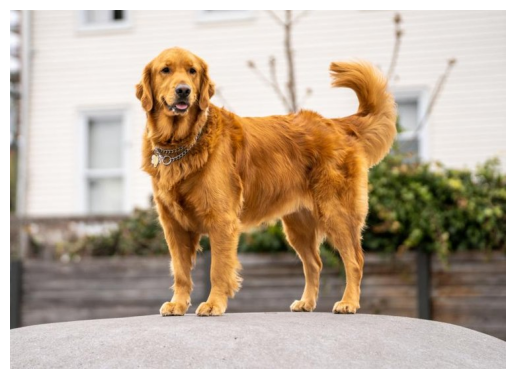

In [102]:
plt.imshow(image)
plt.axis('off') 
plt.show()

Convert Binary Image

In [103]:
grayimg = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
ret,thresh = cv2.threshold(grayimg,70,255,0)

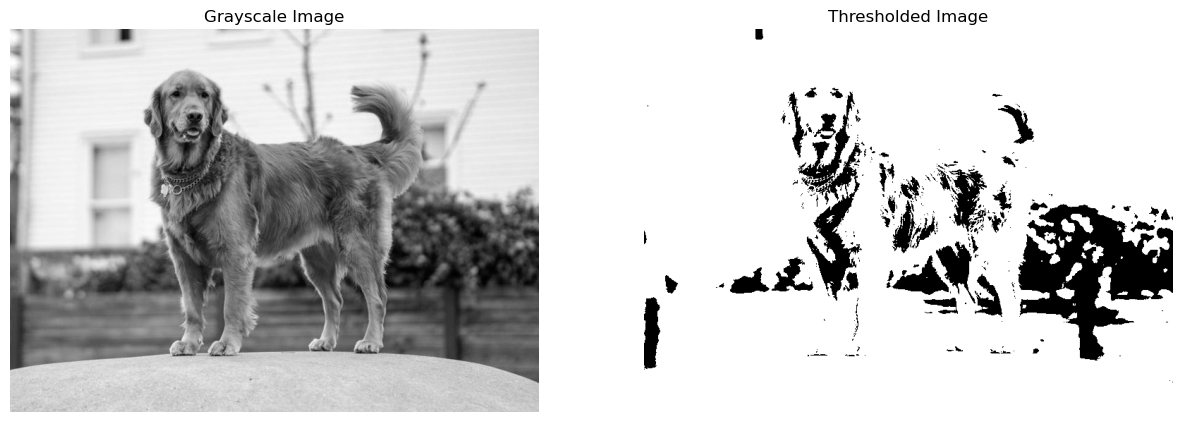

In [104]:
    fig, axs = plt.subplots(1, 2, figsize=(15, 5))
    # Show the grayscale image
    axs[0].imshow(grayimg, cmap='gray')
    axs[0].axis('off')  # Turn off axes
    axs[0].set_title('Grayscale Image')

    # Show the thresholded image
    axs[1].imshow(thresh, cmap='gray')
    axs[1].axis('off')  # Turn off axes
    axs[1].set_title('Thresholded Image')

    # Display the plots
    plt.show()

Boundary sum

In [105]:
gimg=grayimg
gimg

array([[219, 215, 210, ..., 219, 219, 219],
       [224, 220, 215, ..., 219, 218, 218],
       [230, 227, 223, ..., 217, 217, 217],
       ...,
       [198, 212, 210, ..., 191, 191, 189],
       [203, 211, 205, ..., 197, 195, 192],
       [209, 207, 195, ..., 204, 205, 203]], dtype=uint8)

In [106]:
def get_boundarySum(test):
    ht=test[0,:]
    hb=test[-1,:]
    vt=test[:,0]
    vb=test[:,-1]
    return np.sum(ht)+np.sum(hb)+np.sum(vt[1:-1])+np.sum(vb[1:-1])

In [107]:
boundarySum=get_boundarySum(gimg)
boundarySum

475144

In [108]:
img2 = np.copy(gimg)
img2[gimg.shape[0]//2, gimg.shape[1]//2] = get_boundarySum(gimg)


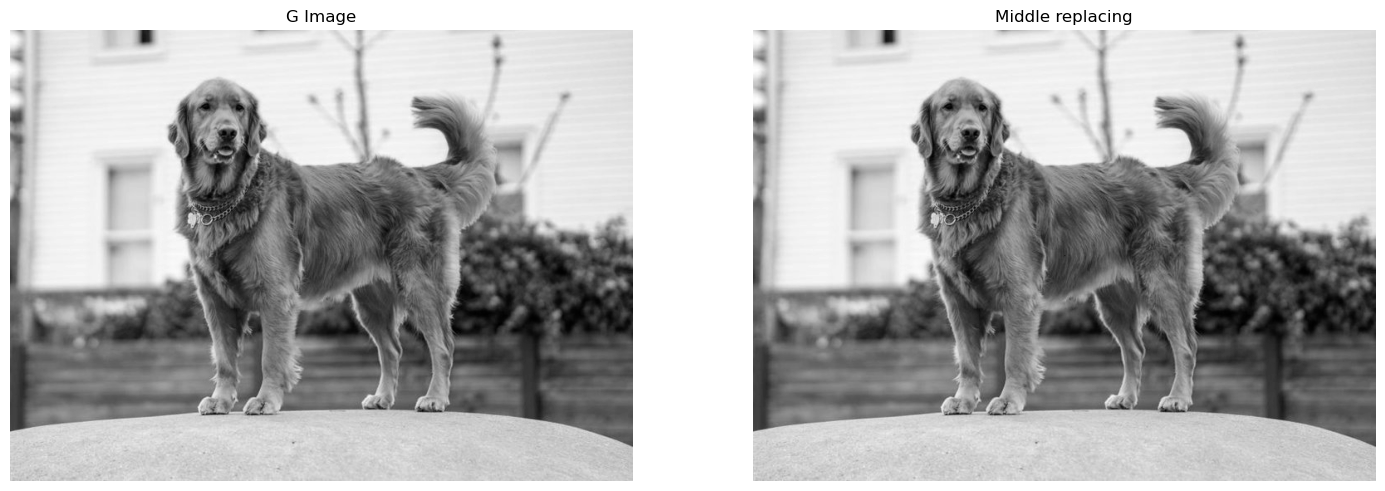

In [109]:
# Assuming gimg and img2 are already defined grayscale images
fig, axs = plt.subplots(1, 2, figsize=(15, 5))

# Show the grayscale image
axs[0].imshow(gimg, cmap='gray')
axs[0].axis('off')  # Turn off axes
axs[0].set_title('G Image')

# Show the thresholded image
axs[1].imshow(img2, cmap='gray')
axs[1].axis('off')  # Turn off axes
axs[1].set_title('Middle replacing')

plt.tight_layout()
plt.show()


Flip Image

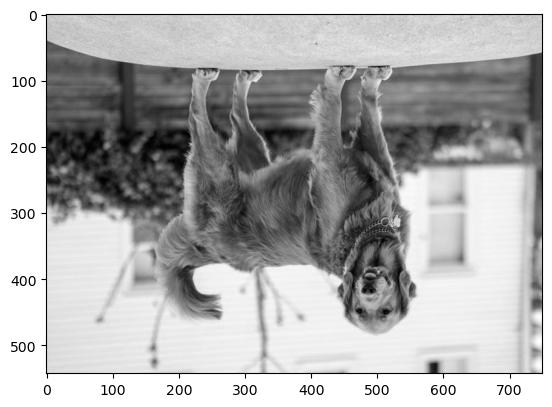

In [110]:
plt.imshow(np.flip(img2), cmap='gray')

Get Diagonal Sum

In [111]:
def diagonal_sum(img):
    diagonal1 = np.trace(img)
    diagonal2 = np.trace(np.fliplr(img))
    return diagonal1+diagonal2-img[img.shape[0]//2,img.shape[1]//2]

In [112]:
diagonal_sum(img2)

172825

Split Function

In [113]:
def split(img):
    img1 = img[:img.shape[0]//2, :img.shape[1]//2]
    img2 = img[:img.shape[0]//2, img.shape[1]//2:]
    img3 = img[img.shape[0]//2:, :img.shape[1]//2]
    img4 = img[img.shape[0]//2:, img.shape[1]//2:]
    return img1, img2, img3, img4

In [114]:
img1,img2,img3,img4 = split(img2)

(-0.5, 374.5, 271.5, -0.5)

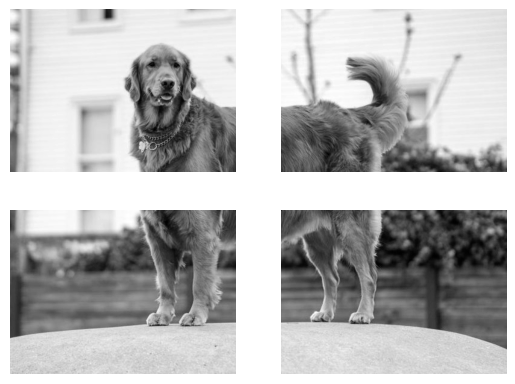

In [115]:
plt.subplot(2,2,1)
plt.imshow(img1, cmap='gray')
plt.axis("off")
plt.subplot(2,2,2)
plt.imshow(img2, cmap='gray')
plt.axis("off")
plt.subplot(2,2,3)
plt.imshow(img3, cmap='gray')
plt.axis("off")
plt.subplot(2,2,4)
plt.imshow(img4, cmap='gray')
plt.axis("off")


Image Concrete

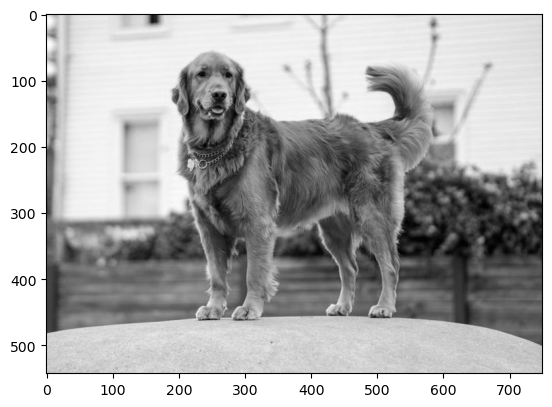

In [116]:
img_merge = np.concatenate((np.concatenate((img1, img2), axis=1), np.concatenate((img3, img4), axis=1)), axis=0)

plt.imshow(img_merge, cmap='gray')

In [117]:
copy_img = np.copy(img2)
copy_img

array([[233, 234, 235, ..., 219, 219, 219],
       [232, 233, 234, ..., 219, 218, 218],
       [231, 232, 233, ..., 217, 217, 217],
       ...,
       [ 60,  59,  58, ...,  74,  70,  68],
       [ 58,  57,  59, ...,  80,  74,  70],
       [ 57,  55,  62, ...,  86,  77,  70]], dtype=uint8)

In [118]:
row = copy_img.shape[0]
column = copy_img.shape[1]
copy_img = np.reshape(copy_img,copy_img.shape[0]*img2.shape[1])
copy_img

array([233, 234, 235, ...,  86,  77,  70], dtype=uint8)

In [119]:
copy_img = np.sort(copy_img)
copy_img

array([  6,  10,  10, ..., 248, 248, 248], dtype=uint8)

In [120]:
copy_img.shape

(101625,)

In [121]:
hist =np.zeros(256)

In [122]:
for i in copy_img:
    hist[i] = hist[i]+1

In [123]:
hist.shape

(256,)

In [124]:
hist = hist/(row*column)
x_axis = np.arange(0,256)

<BarContainer object of 256 artists>

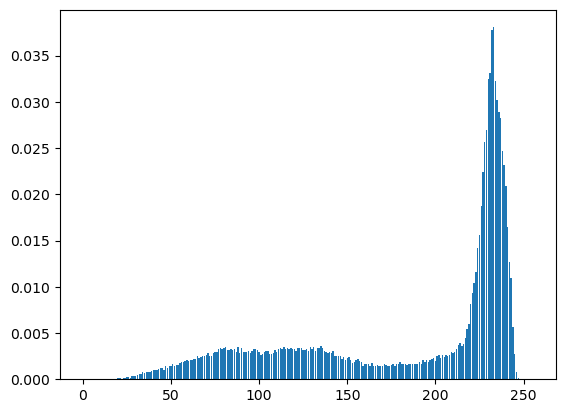

In [125]:
plt.bar(x_axis,hist)